<a href="https://colab.research.google.com/github/JCaballerot/Data_science_for_business/blob/main/regresion_lineal/sidney_data_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librerías

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Leyendo data

In [ ]:

pddf = pd.read_csv('house_price_data.csv')
pddf.head()

In [ ]:
pddf.columns.tolist()

## Analizando el target

In [ ]:
# Gráfico de distribución 
sns.displot(pddf.price, kind="kde", fill=True)

In [ ]:
pddf.shape

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf.price, orient="h")

In [16]:
# Tratamiento por z-score
upper_limit = np.mean(pddf.price) + 3*np.std(pddf.price)
lower_limit = np.mean(pddf.price) - 3*np.std(pddf.price)

pddf['price_t'] = pddf.price.apply(lambda x: upper_limit if x > upper_limit
                                        else lower_limit if x < lower_limit else x)

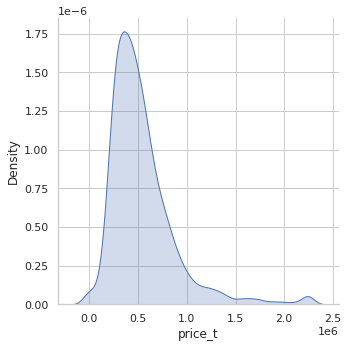

In [17]:
# Gráfico de distribución 
sns.displot(pddf.price_t, kind="kde", fill=True)

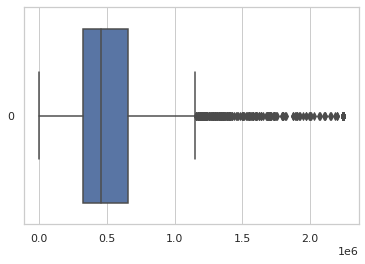

In [18]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf.price_t, orient="h")

Text(0, 0.5, 'Precio de la vivienda')

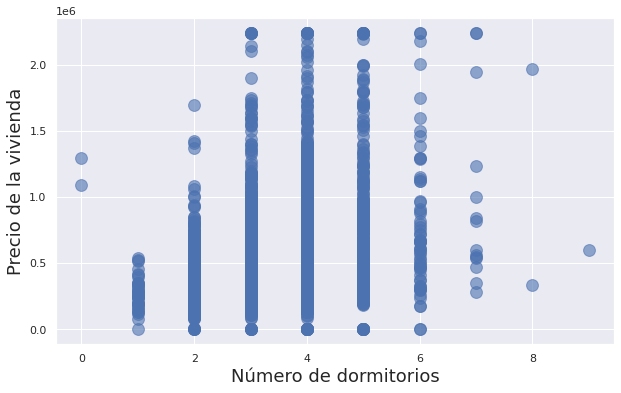

In [31]:
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(pddf.bedrooms, pddf.price_t, s = 140, alpha = 0.6)
plt.xlabel("Número de dormitorios", fontsize=18)
plt.ylabel("Precio de la vivienda", rotation=90, fontsize=18)

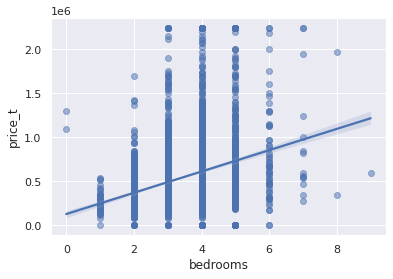

In [33]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.regplot(data = pddf, x="bedrooms", y="price_t", scatter_kws = {'alpha': 0.5})

In [34]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(pddf.price_t, 
             sm.add_constant(pddf[['bedrooms']]))
res = mod.fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                price_t   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     542.6
Date:                Sat, 18 Feb 2023   Prob (F-statistic):          1.51e-113
Time:                        16:49:00   Log-Likelihood:                -64830.
No. Observations:                4600   AIC:                         1.297e+05
Df Residuals:                    4598   BIC:                         1.297e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.291e+05   1.83e+04      7.075      0.0